In [1]:
import numpy as np
import pandas as pd
import os
import os.path as op
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('C:/Users/doeringe/Documents/BrainAge/TestData/MCI_baseline_2.csv')
labels = pd.read_csv('C:/Users/doeringe/Documents/BrainAge/TestData/ADNI_MCI.csv',sep=";")
df['AGE'] = np.nan
for index,row in df.iterrows():
    pat = df['Subject'][index]
    if pat in labels['PTID'].tolist():
        df['AGE'][index] = labels['AGE'][labels['PTID']==pat].values[0]


c:\python\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [2]:
df_new = df.dropna(subset=['AGE'])
X = df_new.values
X = X[:,1:-1]
y = df_new['AGE'].values
y_pseudo,y_pseudo_edges = pd.qcut(y,q=10,labels=range(0,10),retbins=True)
#print(y_pseudo.categories)
#print(y_pseudo_edges)
df_new['AGE_bins'] = y_pseudo
value_counts = df_new['AGE_bins'].value_counts().sort_index()
#print(value_counts)

print('SUMMARY:\n')
for i in range(0,10):
    print('{} individuals in category {} (age-range: {}-{} years)'.format(value_counts[i],
                                                                          y_pseudo.categories[i],
                                                                          y_pseudo_edges[i],
                                                                          y_pseudo_edges[i+1]))

SUMMARY:

72 individuals in category 0 (age-range: 55.0-61.9 years)
67 individuals in category 1 (age-range: 61.9-64.8 years)
70 individuals in category 2 (age-range: 64.8-68.2 years)
73 individuals in category 3 (age-range: 68.2-70.6 years)
66 individuals in category 4 (age-range: 70.6-72.2 years)
67 individuals in category 5 (age-range: 72.2-74.2 years)
76 individuals in category 6 (age-range: 74.2-76.4 years)
64 individuals in category 7 (age-range: 76.4-78.5 years)
67 individuals in category 8 (age-range: 78.5-82.3 years)
69 individuals in category 9 (age-range: 82.3-91.4 years)


c:\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
df_new['AGE_category'] = y_pseudo.tolist()
print(df_new['AGE_category'].value_counts())

6    76
3    73
0    72
2    70
9    69
8    67
5    67
1    67
4    66
7    64
Name: AGE_category, dtype: int64


c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
x_train, x_test,  y_train, y_test, id_train, id_test = train_test_split(
    X, y, df_new['Subject'], test_size=.2, random_state=42,
    stratify=y_pseudo)

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


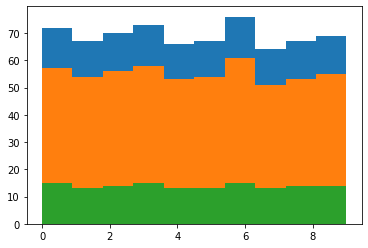

In [5]:
df_new['train'] = ["T" if x in id_train.values else "F" for x in df_new['Subject']]

plt.hist(df_new['AGE_category'])
plt.hist(df_new['AGE_category'][df_new['train']=='T'])
plt.hist(df_new['AGE_category'][df_new['train']=='F'])
plt.show()

df_new.to_csv('test_train_stratified.csv')